### Original Dataset: 'D0-KPMG_VI_New_raw_data_update_final.xlsx'

### Dataset used: 'D2-Preprocessed-Dataset.xlsx'

### Steps Followed
**Data Exploration ('Data-Exploration.ipynb' - Data Exploration)**  
- Select Target Variable   
- Outliers Analysis and Treatment
- Bivariate Analysis      
- Missing Value Treatment  

## Importing Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
prepdata_tx = pd.read_excel("D2-Preprocessed-Dataset.xlsx", sheet_name="Transactions")
prepdata_ci = pd.read_excel("D2-Preprocessed-Dataset.xlsx", sheet_name="CustomerInfo")

# Data Exploration

In [24]:
def correlation_map(dataset, contvar_list):
    cont_var = dataset[contvar_list]
    corr_var = cont_var.corr()
    sns.heatmap(corr_var, square=True)

In [29]:
def cumulative_histogram(dataset, independent_var, target_var):
    total_count = dataset.groupby(independent_var)[target_var].sum()
    total_count.plot(kind='bar')

## Dataset: Transactions

In [3]:
prepdata_tx.head()

,customer_id,online_order,purchase_month,sales_profit
0,2950,0.0,2,17.87
1,3120,1.0,5,1702.55
2,402,0.0,10,1544.61
3,3135,0.0,8,817.36
4,787,1.0,10,1055.82


In [4]:
prepdata_tx.describe()

,customer_id,online_order,purchase_month,sales_profit
count,19625.000000,19273.000000,19625.000000,19625.000000
mean,1739.572994,0.500285,6.515465,551.923772
std,1011.957495,0.500013,3.450317,493.502909
min,1.000000,0.000000,1.000000,4.800000
25%,858.000000,0.000000,4.000000,133.780000
50%,1737.000000,1.000000,7.000000,445.210000
75%,2615.000000,1.000000,10.000000,830.240000
max,5034.000000,1.000000,12.000000,1702.550000


### Outliers Analysis

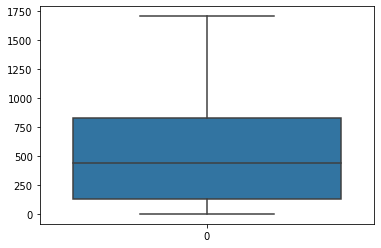

In [33]:
sns.boxplot(data=prepdata_tx['sales_profit'])

'sales_profit' lies between (0, 1750). No outliers are present.

### Bivariate Analysis

#### Correlation

In [21]:
contvar_tx = ['online_order', 'purchase_month', 'sales_profit']

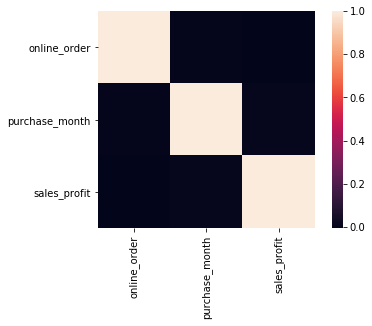

In [25]:
correlation_map(prepdata_tx, contvar_tx)

No correlation between any of the variables.

#### Distribution Within Categorical Variables

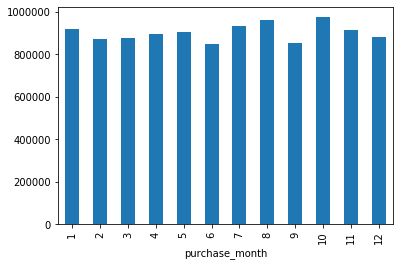

In [30]:
cumulative_histogram(prepdata_tx, 'purchase_month', 'sales_profit')

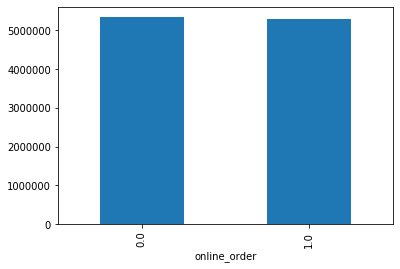

In [31]:
cumulative_histogram(prepdata_tx, 'online_order', 'sales_profit')

## Dataset: CustomerInfo

In [6]:
prepdata_ci.head()

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,state,property_valuation
0,1,1,93,1,1,11.0,64.0,2.0,10.0
1,2,0,81,1,1,16.0,37.0,2.0,10.0
2,3,0,61,1,1,15.0,63.0,NaN,NaN
3,4,0,33,1,0,7.0,56.0,1.0,9.0
4,5,1,56,2,1,8.0,40.0,2.0,4.0


In [7]:
prepdata_ci.describe()

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,state,property_valuation
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3911.000000,3911.000000,3994.000000,3994.000000
mean,2000.364432,0.553777,48.871186,1.755378,0.505753,10.658655,39.962925,2.045819,7.516274
std,1154.618313,0.539632,28.709682,0.834093,0.500029,5.661042,12.795916,0.680415,2.824326
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,15.000000,1.000000,1.000000
25%,1001.250000,0.000000,24.000000,1.000000,0.000000,6.000000,30.000000,2.000000,6.000000
50%,2000.500000,1.000000,48.000000,1.500000,1.000000,11.000000,40.000000,2.000000,8.000000
75%,2999.750000,1.000000,73.000000,3.000000,1.000000,15.000000,49.000000,3.000000,10.000000
max,4000.000000,2.000000,99.000000,3.000000,1.000000,22.000000,174.000000,3.000000,12.000000


### Outliers Analysis
Other variables excluding 'age' doesn't possess any abnormality or outliers in the recorded values. Hence, eliminated the analysis from notebook.

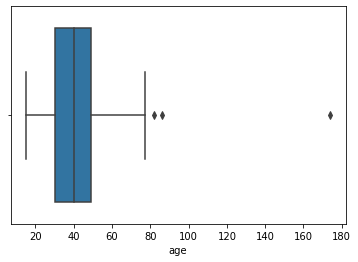

In [39]:
sns.boxplot(prepdata_ci['age'])

Dataset "CustomerDemographic" had a dirty-value in 'DOB' with year as *1843*. Thus it yielded record with 'age' = 174. 
Considering it as a typo for *1943* we will replace that value with 'age' = 74.

In [40]:
prepdata_ci.loc[prepdata_ci.age==174, 'age'] = 74

### Bivariate Analysis

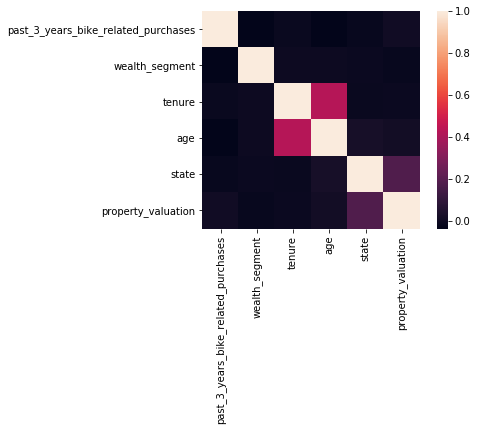

In [47]:
contvar_ci = ['past_3_years_bike_related_purchases', 'wealth_segment', 'tenure', 'age', 'state', 'property_valuation']
correlation_map(prepdata_ci, contvar_ci)

Only ['tenure', 'age'] and ['state', 'property_valuation'] variable-pairs has minor correlation which was quite deterministic from the dataset. 

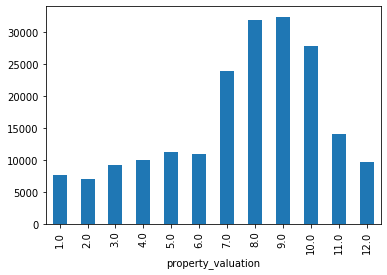

In [54]:
cumulative_histogram(prepdata_ci, 'property_valuation', 'past_3_years_bike_related_purchases')

### Missing Value Treatment  
**87: 'tenure', 'age'**  
Impute median values

**4: 'state', 'property_valuation'**  
1. Determine relation between 'wealth_segment' and 'property_valuation' (Respective median values of 'property_valuation' for each 'wealth_segment [1, 2, 3])
2. Impute missing values in 'property_valuation' based on 'wealth_segment'
3. Determine relation between 'state' and 'property_valuation' (Range in which 'property_valuation' lies for each 'state'
4. Imput missing values in 'state' based on 'property valuation'

'wealth_segment' --> 'property_valuation' --> 'state'

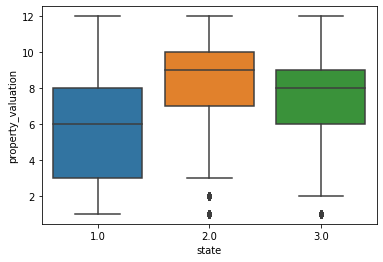

In [35]:
sns.boxplot(x=prepdata_ci['state'], y=prepdata_ci['property_valuation'])

Exclusive range of 'property_valuation' for each 'state': {1:[1, 6], 2:[9, 12], 3:[7, 8]}

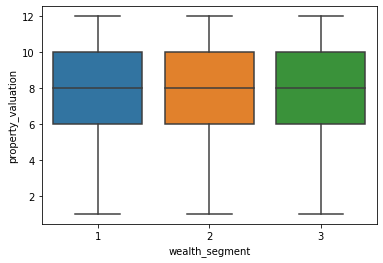

In [36]:
sns.boxplot(x=prepdata_ci['wealth_segment'], y=prepdata_ci['property_valuation'])

Impute median value in missing values of 'property_valuation'
Thus, impute following values in 'property_valuation' (=8) and 'state' (=3)

In [66]:
prepdata_ci['property_valuation'].fillna(prepdata_ci['property_valuation'].median(), axis=0, inplace=True)
prepdata_ci['state'].fillna(3, axis=0, inplace=True)
prepdata_ci['tenure'].fillna(prepdata_ci['tenure'].median(), axis=0, inplace=True)
prepdata_ci['age'].fillna(prepdata_ci['age'].median(), axis=0, inplace=True)

In [69]:
copyset_tx = prepdata_tx
copyset_ci = prepdata_ci

# Data Transformation

In [72]:
dataset = pd.merge(left=copyset_tx, right=copyset_ci, how='left', left_on='customer_id', right_on='customer_id')

In [74]:
dataset.head().transpose()

,0,1,2,3,4
customer_id,2950.00,3120.00,402.00,3135.00,787.00
online_order,0.00,1.00,0.00,0.00,1.00
purchase_month,2.00,5.00,10.00,8.00,10.00
sales_profit,17.87,1702.55,1544.61,817.36,1055.82
gender,0.00,1.00,0.00,0.00,1.00
past_3_years_bike_related_purchases,19.00,89.00,9.00,83.00,29.00
wealth_segment,1.00,1.00,2.00,1.00,2.00
owns_car,1.00,1.00,0.00,0.00,1.00
tenure,10.00,10.00,22.00,16.00,2.00
age,62.00,38.00,40.00,55.00,21.00


In [75]:
dataset.describe()

,customer_id,online_order,purchase_month,sales_profit,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,state,property_valuation
count,19625.000000,19273.000000,19625.000000,19625.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000,19614.000000
mean,1739.572994,0.500285,6.515465,551.923772,0.545988,48.812940,1.752830,0.503875,10.685429,39.873458,2.039768,7.516213
std,1011.957495,0.500013,3.450317,493.502909,0.541455,28.580429,0.834665,0.499998,5.613747,12.496828,0.682094,2.824299
min,1.000000,0.000000,1.000000,4.800000,0.000000,0.000000,1.000000,0.000000,1.000000,15.000000,1.000000,1.000000
25%,858.000000,0.000000,4.000000,133.780000,0.000000,24.000000,1.000000,0.000000,6.000000,31.000000,2.000000,6.000000
50%,1737.000000,1.000000,7.000000,445.210000,1.000000,48.000000,1.000000,1.000000,11.000000,40.000000,2.000000,8.000000
75%,2615.000000,1.000000,10.000000,830.240000,1.000000,73.000000,3.000000,1.000000,15.000000,49.000000,3.000000,10.000000
max,5034.000000,1.000000,12.000000,1702.550000,2.000000,99.000000,3.000000,1.000000,22.000000,86.000000,3.000000,12.000000


In [85]:
temp = list(prepdata_tx['customer_id'].unique())

In [90]:
temp.sort()

In [98]:
len(temp)

3493